In [ ]:
# Gerekli kütüphaneleri yükle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

 78% 12.0M/15.3M [00:01<00:00, 17.7MB/s]
100% 15.3M/15.3M [00:01<00:00, 12.1MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Veri setlerini yükle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Eğitim ve test verilerini incele
print("Eğitim verisi şekli:", train_data.shape)
print("Test verisi şekli:", test_data.shape)

Eğitim verisi şekli: (42000, 785)
Test verisi şekli: (28000, 784)


In [ ]:
# Giriş ve çıkış verilerini ayır
X = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalizasyon
y = to_categorical(train_data['label'], num_classes=10)

# Test verisini normalize et
X_test = test_data.values.reshape(-1, 28, 28, 1) / 255.0

# Eğitim ve doğrulama veri setlerini ayır
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.7853 - loss: 0.6762 - val_accuracy: 0.9737 - val_loss: 0.0870
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - accuracy: 0.9623 - loss: 0.1280 - val_accuracy: 0.9818 - val_loss: 0.0582
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.9752 - loss: 0.0849 - val_accuracy: 0.9845 - val_loss: 0.0492
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - accuracy: 0.9793 - loss: 0.0663 - val_accuracy: 0.9844 - val_loss: 0.0459
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9822 - loss: 0.0566 - val_accuracy: 0.9863 - val_loss: 0.0406
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9846 - loss: 0.0487 - val_accuracy: 0.9890 - val_loss: 0.0339
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.9868 - loss: 0.0441 - val_accuracy: 0.9877 - val_loss: 0.0387
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.9887 - loss: 0.0349 - 

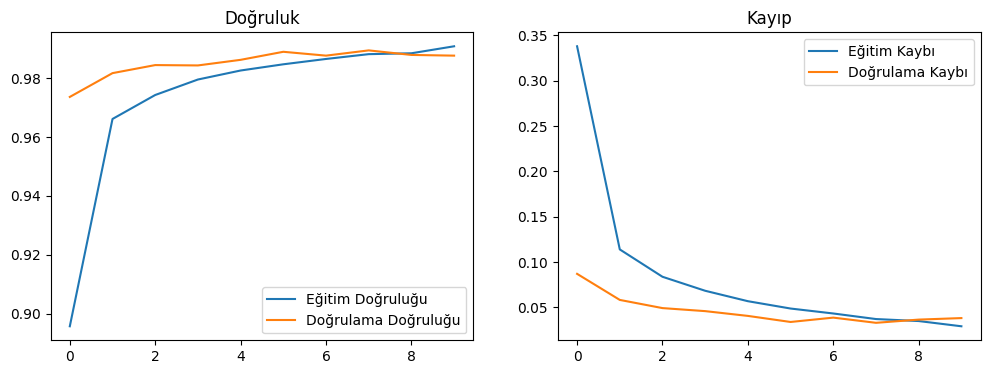

In [ ]:
# Doğruluk ve kayıp grafikleri
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Doğruluk')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Kayıp')
plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


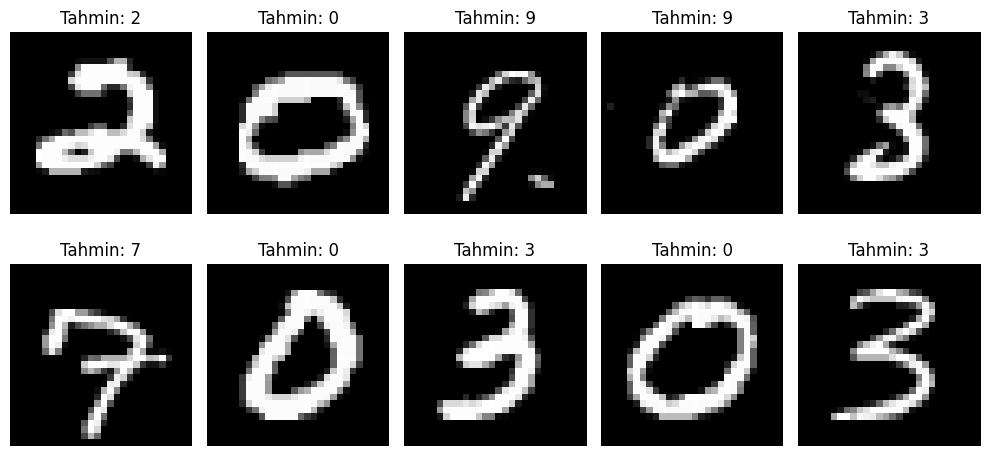

In [ ]:
# Test verisi için tahmin
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# İlk birkaç tahmini göster
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Tahmin: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()